In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [ ]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split

In [ ]:
pd.options.display.float_format = '{:.3f}'.format #지수 표현 없애기
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

# EXCUTE_MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def show_result(y_test, prediction):

  # confusion_matrix 시각화
  sns.heatmap(confusion_matrix(y_test, prediction), annot=True,fmt="d", cmap='Reds')
  plt.xlabel('Predict')
  plt.ylabel('Actual')
  plt.show()

  #Confusion_matrix
  print(confusion_matrix(y_test, prediction))

  # 정확도
  print("accuracy", round( accuracy_score(y_test,prediction),3))

  #정밀도
  print("precision : ", round( precision_score(y_test, prediction),3) ) 

  #재현율
  print("recall : ", round( recall_score(y_test, prediction), 3) )

  #f1-score
  print("f1_score : ", round( f1_score(y_test, prediction), 3) )

In [ ]:
def change_cutoff(result_df):

  print( result_df.groupby(['actual', 'prediction'])['부도_prob'].describe() )
  value_00 = result_df[(result_df['actual']==0) & (result_df['prediction']== 0)]['부도_prob'].max()
  value_01 = result_df[(result_df['actual']==0) & (result_df['prediction']== 1)]['부도_prob'].min()
  value_10 = result_df[(result_df['actual']==1) & (result_df['prediction']== 0)]['부도_prob'].max()
  value_11 = result_df[(result_df['actual']==1) & (result_df['prediction']== 1)]['부도_prob'].min()

  if value_10 < value_00:
    cutoff = value_11
    result_df.loc[(result_df['actual']==0) & (result_df['prediction']== 1) & (result_df['부도_prob']<cutoff) , 'prediction'] = 0
  
  if value_11 > value_01:
    cutoff= value_00
    result_df.loc[(result_df['actual']==1) & (result_df['prediction']== 0) & (result_df['부도_prob']>cutoff) , 'prediction'] = 1

  return result_df

## basic_model

In [ ]:
def Excute_lg (X_train, y_train, X_test, y_test):
  lr = LogisticRegression(random_state=0)
  
  lr.fit(X_train, y_train) 
  prediction = lr.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_sgd(X_train, y_train, X_test, y_test):
  sgd = SGDClassifier(random_state=0)

  sgd.fit(X_train, y_train)
  prediction = sgd.predict(X_test)
  
  show_result(y_test, prediction)

In [ ]:
def Excute_knn(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()

  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_svm(X_train, y_train, X_test, y_test):
  svc = SVC(random_state=0)

  svc.fit(X_train, y_train)
  prediction = svc.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_dt(X_train, y_train, X_test, y_test):
  dt = DecisionTreeClassifier(random_state=0)

  dt.fit(X_train, y_train)
  prediction = dt.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_pr(X_train, y_train, X_test, y_test):
  dt2 = DecisionTreeClassifier(max_depth=2)

  dt2.fit(X_train, y_train)
  prediction = dt2.predict(X_test)
  
  show_result(y_test, prediction)

In [ ]:
def Excute_rf(X_train, y_train, X_test, y_test):
  rfc = RandomForestClassifier(random_state=0)

  rfc.fit(X_train, y_train)
  prediction = rfc.predict(X_test)

  show_result(y_test, prediction)

## cutoff 조정 model

In [ ]:
def Excute_lg_change_cutoff (X_train, y_train, X_test, y_test):
  lr = LogisticRegression(random_state=0, probability=True)
  lr.fit(X_train, y_train) 
  prediction = lr.predict(X_test)
  prediction_prob =lr.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_sgd_change_cutoff(X_train, y_train, X_test, y_test):
  sgd = SGDClassifier(random_state=0)
  sgd.fit(X_train, y_train)
  prediction = sgd.predict(X_test)
  prediction_prob =sgd.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_svm_change_cutoff(X_train, y_train, X_test, y_test):
  svc = SVC(random_state=0, probability=True)
  svc.fit(X_train, y_train)
  prediction = svc.predict(X_test)
  prediction_prob =svc.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_knn_change_cutoff(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)
  prediction_prob =knn.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_dt_change_cutoff(X_train, y_train, X_test, y_test):
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)
  prediction = dt.predict(X_test)
  prediction_prob =dt.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_pr_change_cutoff(X_train, y_train, X_test, y_test):
  dt2 = DecisionTreeClassifier(max_depth=2)
  dt2.fit(X_train, y_train)
  prediction = dt2.predict(X_test)
  prediction_prob =dt2.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_rf_change_cutoff(X_train, y_train, X_test, y_test):
  rfc = RandomForestClassifier(random_state=0)
  rfc.fit(X_train, y_train)
  prediction = rfc.predict(X_test)
  prediction_prob =rfc.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

# CASE 1. oversampling X, validation set X

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0 0 0 ... 0 0 0]


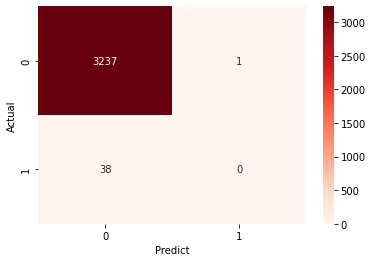

[[3237    1]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


In [ ]:
Excute_lg(X_train, y_train, X_test, y_test)

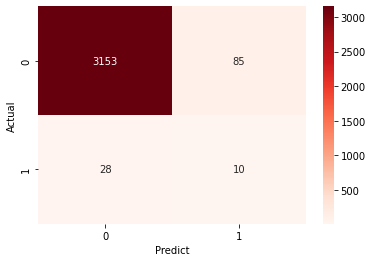

[[3153   85]
 [  28   10]]
accuracy 0.966
precision :  0.105
recall :  0.263
f1_score :  0.15


In [ ]:
Excute_sgd(X_train, y_train, X_test, y_test)

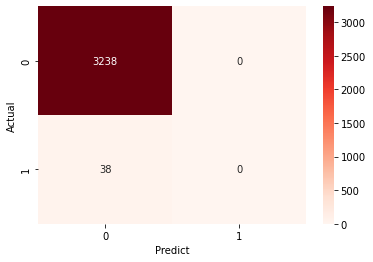

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_knn(X_train, y_train, X_test, y_test)

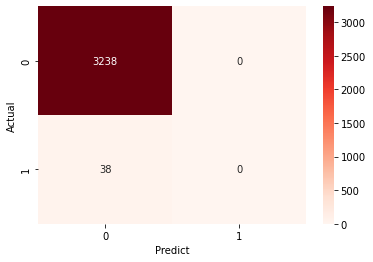

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_svm(X_train, y_train, X_test, y_test)

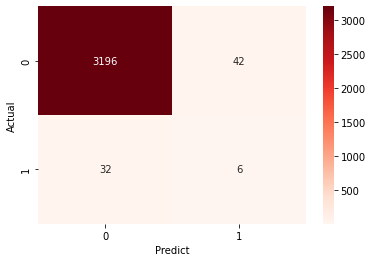

[[3196   42]
 [  32    6]]
accuracy 0.977
precision :  0.125
recall :  0.158
f1_score :  0.14


In [ ]:
Excute_dt(X_train, y_train, X_test, y_test)

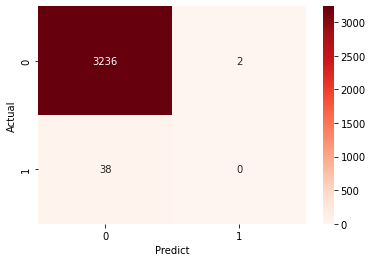

[[3236    2]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


In [ ]:
Excute_pr(X_train, y_train, X_test, y_test)

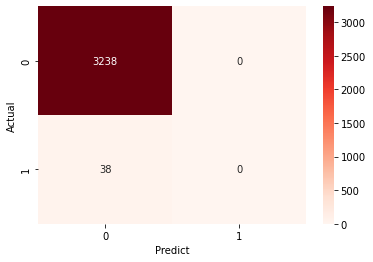

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_rf(X_train, y_train, X_test, y_test)

# CASE 2. SMOTE_oversampling

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'Target feature - Bankrupt after SMOTE')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_

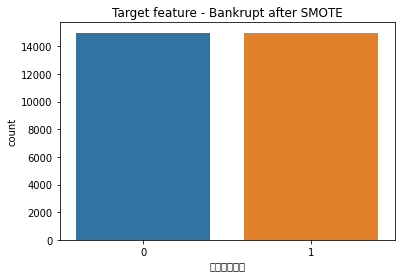

In [ ]:
sns.countplot(x=y_oversampled)
plt.title('Target feature - Bankrupt after SMOTE')

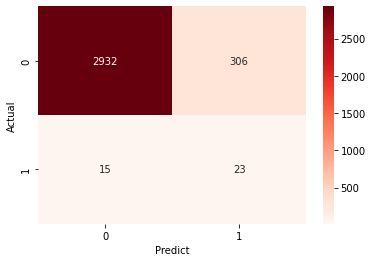

[[2932  306]
 [  15   23]]
accuracy 0.902
precision :  0.07
recall :  0.605
f1_score :  0.125


In [ ]:
Excute_lg(X_oversampled, y_oversampled, X_test, y_test)

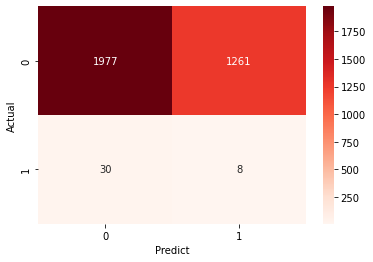

[[1977 1261]
 [  30    8]]
accuracy 0.606
precision :  0.006
recall :  0.211
f1_score :  0.012


In [ ]:
Excute_sgd(X_oversampled, y_oversampled, X_test, y_test)

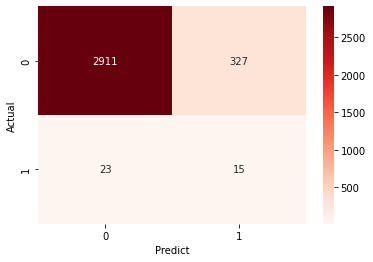

[[2911  327]
 [  23   15]]
accuracy 0.893
precision :  0.044
recall :  0.395
f1_score :  0.079


In [ ]:
Excute_knn(X_oversampled, y_oversampled, X_test, y_test)

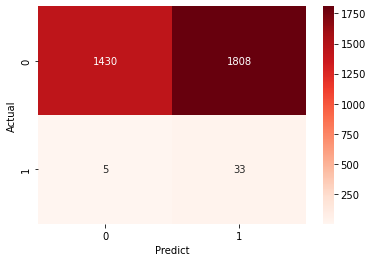

[[1430 1808]
 [   5   33]]
accuracy 0.447
precision :  0.018
recall :  0.868
f1_score :  0.035


In [ ]:
Excute_svm(X_oversampled, y_oversampled, X_test, y_test)

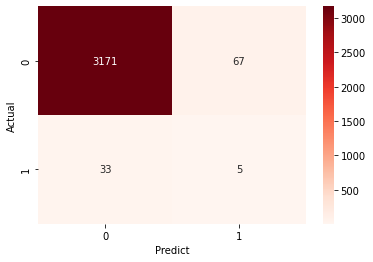

[[3171   67]
 [  33    5]]
accuracy 0.969
precision :  0.069
recall :  0.132
f1_score :  0.091


In [ ]:
Excute_dt(X_oversampled, y_oversampled, X_test, y_test)

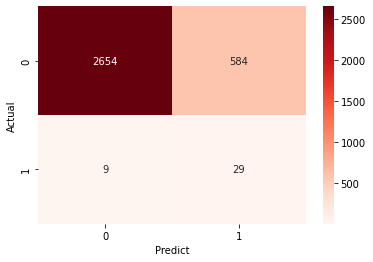

[[2654  584]
 [   9   29]]
accuracy 0.819
precision :  0.047
recall :  0.763
f1_score :  0.089


In [ ]:
Excute_pr(X_oversampled, y_oversampled, X_test, y_test)

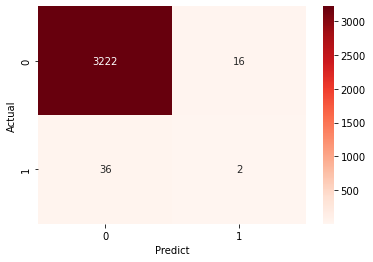

[[3222   16]
 [  36    2]]
accuracy 0.984
precision :  0.111
recall :  0.053
f1_score :  0.071


In [ ]:
Excute_rf(X_oversampled, y_oversampled, X_test, y_test)

# CASE 3. random_oversampling

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


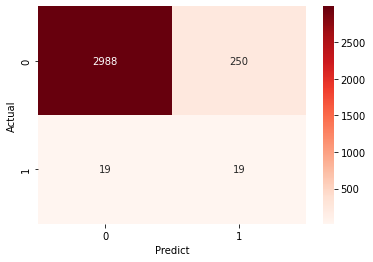

[[2988  250]
 [  19   19]]
accuracy 0.918
precision :  0.071
recall :  0.5
f1_score :  0.124


In [ ]:
Excute_lg(X_oversampled, y_oversampled, X_test, y_test)

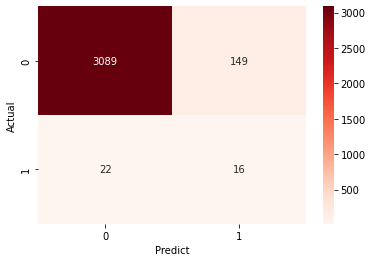

[[3089  149]
 [  22   16]]
accuracy 0.948
precision :  0.097
recall :  0.421
f1_score :  0.158


In [ ]:
Excute_sgd(X_oversampled, y_oversampled, X_test, y_test)

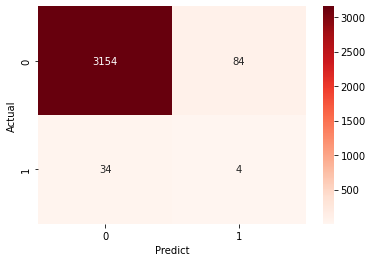

[[3154   84]
 [  34    4]]
accuracy 0.964
precision :  0.045
recall :  0.105
f1_score :  0.063


In [ ]:
Excute_knn(X_oversampled, y_oversampled, X_test, y_test)

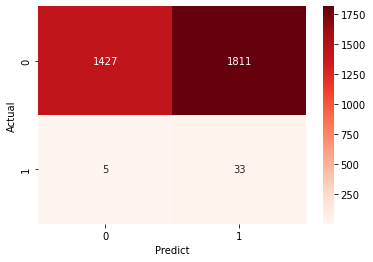

[[1427 1811]
 [   5   33]]
accuracy 0.446
precision :  0.018
recall :  0.868
f1_score :  0.035


In [ ]:
Excute_svm(X_oversampled, y_oversampled, X_test, y_test)

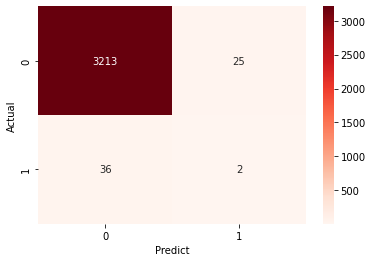

[[3213   25]
 [  36    2]]
accuracy 0.981
precision :  0.074
recall :  0.053
f1_score :  0.062


In [ ]:
Excute_dt(X_oversampled, y_oversampled, X_test, y_test)

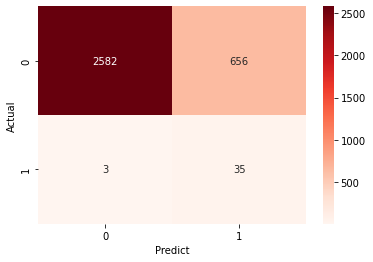

[[2582  656]
 [   3   35]]
accuracy 0.799
precision :  0.051
recall :  0.921
f1_score :  0.096


In [ ]:
Excute_pr(X_oversampled, y_oversampled, X_test, y_test)

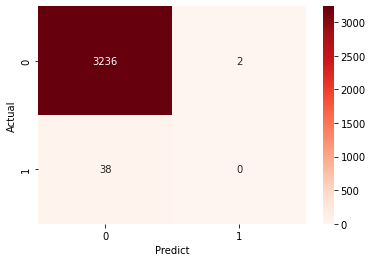

[[3236    2]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


In [ ]:
Excute_rf(X_oversampled, y_oversampled, X_test, y_test)

# CASE 4. random_undersampling



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

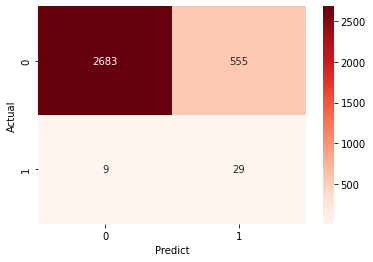

[[2683  555]
 [   9   29]]
accuracy 0.828
precision :  0.05
recall :  0.763
f1_score :  0.093


In [ ]:
Excute_lg(X_undersampled, y_undersampled, X_test, y_test)

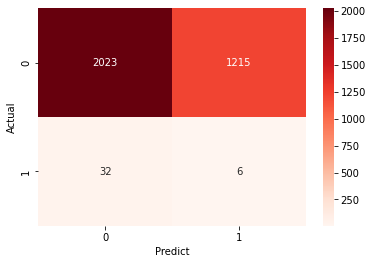

[[2023 1215]
 [  32    6]]
accuracy 0.619
precision :  0.005
recall :  0.158
f1_score :  0.01


In [ ]:
Excute_sgd(X_undersampled, y_undersampled, X_test, y_test)

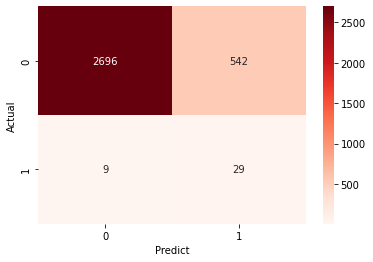

[[2696  542]
 [   9   29]]
accuracy 0.832
precision :  0.051
recall :  0.763
f1_score :  0.095


In [ ]:
Excute_knn(X_undersampled, y_undersampled, X_test, y_test)

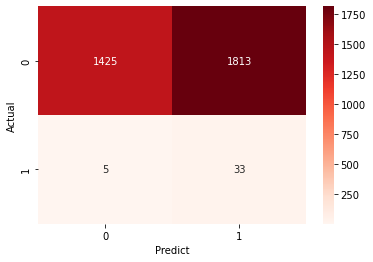

[[1425 1813]
 [   5   33]]
accuracy 0.445
precision :  0.018
recall :  0.868
f1_score :  0.035


In [ ]:
Excute_svm(X_undersampled, y_undersampled, X_test, y_test)

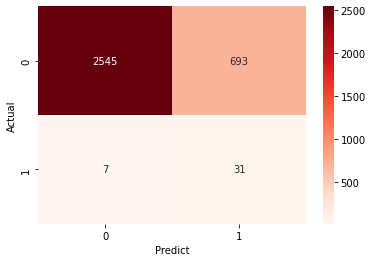

[[2545  693]
 [   7   31]]
accuracy 0.786
precision :  0.043
recall :  0.816
f1_score :  0.081


In [ ]:
Excute_dt(X_undersampled, y_undersampled, X_test, y_test)

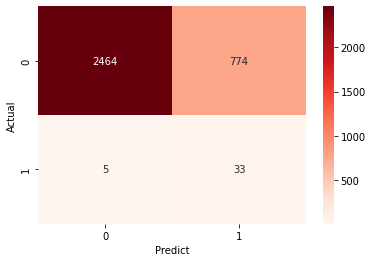

[[2464  774]
 [   5   33]]
accuracy 0.762
precision :  0.041
recall :  0.868
f1_score :  0.078


In [ ]:
Excute_pr(X_undersampled, y_undersampled, X_test, y_test)

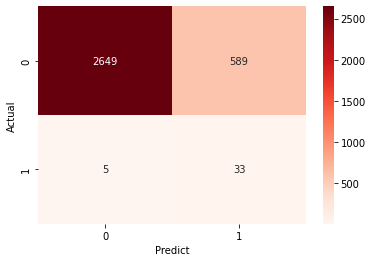

[[2649  589]
 [   5   33]]
accuracy 0.819
precision :  0.053
recall :  0.868
f1_score :  0.1


In [ ]:
Excute_rf(X_undersampled, y_undersampled, X_test, y_test)

# CASE 5. standard scaling

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


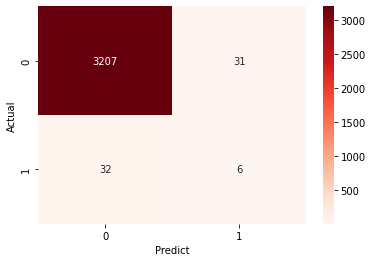

[[3207   31]
 [  32    6]]
accuracy 0.981
precision :  0.162
recall :  0.158
f1_score :  0.16


In [ ]:
Excute_lg(X_train_scaled, y_train, X_test_scaled, y_test)

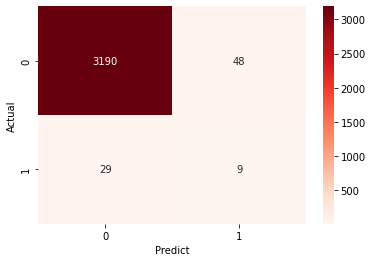

[[3190   48]
 [  29    9]]
accuracy 0.976
precision :  0.158
recall :  0.237
f1_score :  0.189


In [ ]:
Excute_sgd(X_train_scaled, y_train, X_test_scaled, y_test)

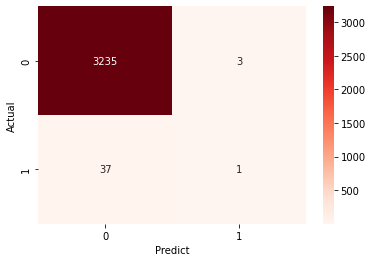

[[3235    3]
 [  37    1]]
accuracy 0.988
precision :  0.25
recall :  0.026
f1_score :  0.048


In [ ]:
Excute_knn(X_train_scaled, y_train, X_test_scaled, y_test)

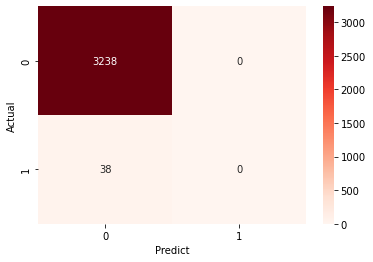

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_svm(X_train_scaled, y_train, X_test_scaled, y_test)

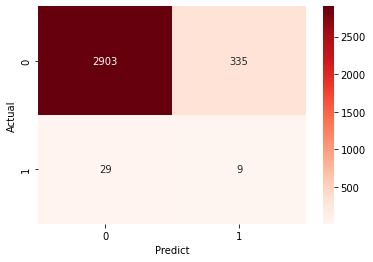

[[2903  335]
 [  29    9]]
accuracy 0.889
precision :  0.026
recall :  0.237
f1_score :  0.047


In [ ]:
Excute_dt(X_train_scaled, y_train, X_test_scaled, y_test)

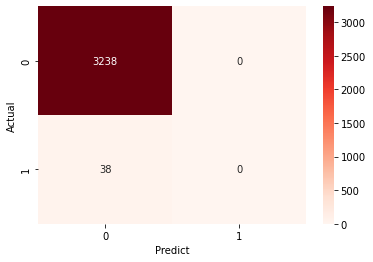

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_pr(X_train_scaled, y_train, X_test_scaled, y_test)

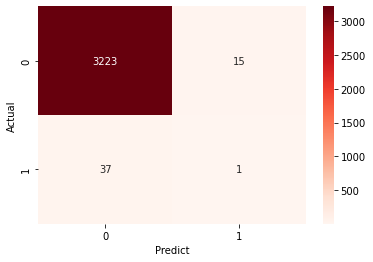

[[3223   15]
 [  37    1]]
accuracy 0.984
precision :  0.062
recall :  0.026
f1_score :  0.037


In [ ]:
Excute_rf(X_train_scaled, y_train, X_test_scaled, y_test)

# CASE 6. standard scaling + random under sampling

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


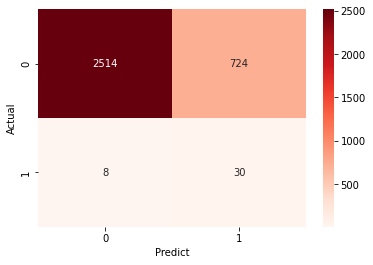

[[2514  724]
 [   8   30]]
accuracy 0.777
precision :  0.04
recall :  0.789
f1_score :  0.076


In [ ]:
Excute_lg(X_undersampled, y_undersampled, X_test_scaled, y_test)

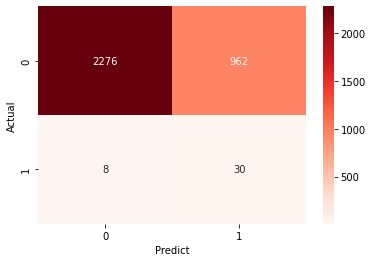

[[2276  962]
 [   8   30]]
accuracy 0.704
precision :  0.03
recall :  0.789
f1_score :  0.058


In [ ]:
Excute_sgd(X_undersampled, y_undersampled, X_test_scaled, y_test)

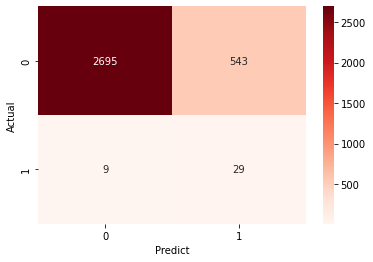

[[2695  543]
 [   9   29]]
accuracy 0.832
precision :  0.051
recall :  0.763
f1_score :  0.095


In [ ]:
Excute_knn(X_undersampled, y_undersampled, X_test_scaled, y_test)

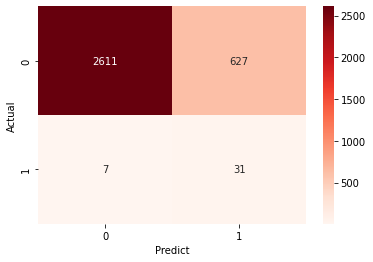

[[2611  627]
 [   7   31]]
accuracy 0.806
precision :  0.047
recall :  0.816
f1_score :  0.089


In [ ]:
Excute_svm(X_undersampled, y_undersampled, X_test_scaled, y_test)

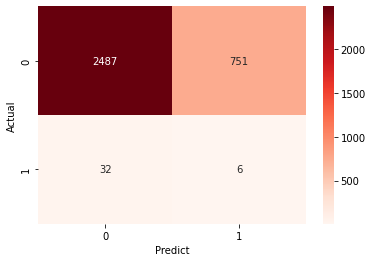

[[2487  751]
 [  32    6]]
accuracy 0.761
precision :  0.008
recall :  0.158
f1_score :  0.015


In [ ]:
Excute_dt(X_undersampled, y_undersampled, X_test_scaled, y_test)

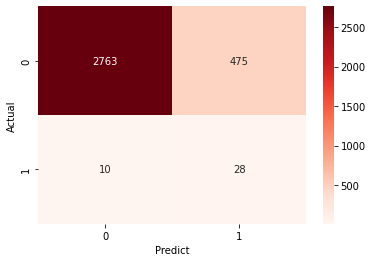

[[2763  475]
 [  10   28]]
accuracy 0.852
precision :  0.056
recall :  0.737
f1_score :  0.104


In [ ]:
Excute_pr(X_undersampled, y_undersampled, X_test_scaled, y_test)

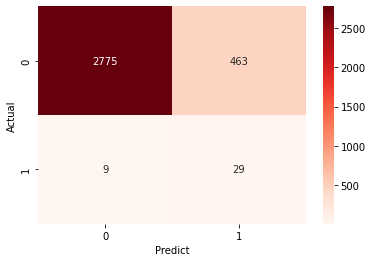

[[2775  463]
 [   9   29]]
accuracy 0.856
precision :  0.059
recall :  0.763
f1_score :  0.109


In [ ]:
Excute_rf(X_undersampled, y_undersampled, X_test_scaled, y_test)

# CASE 7.standard scaling + SMOTE

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


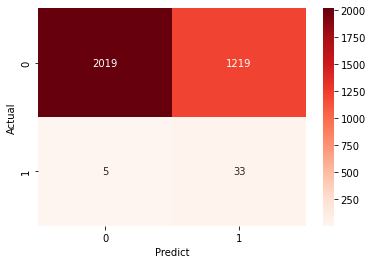

[[2019 1219]
 [   5   33]]
accuracy 0.626
precision :  0.026
recall :  0.868
f1_score :  0.051


In [ ]:
Excute_lg(X_oversampled,y_oversampled, X_test_scaled, y_test)

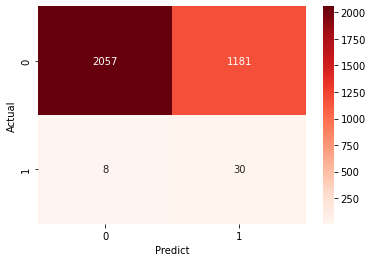

[[2057 1181]
 [   8   30]]
accuracy 0.637
precision :  0.025
recall :  0.789
f1_score :  0.048


In [ ]:
Excute_sgd(X_oversampled,y_oversampled, X_test_scaled, y_test)

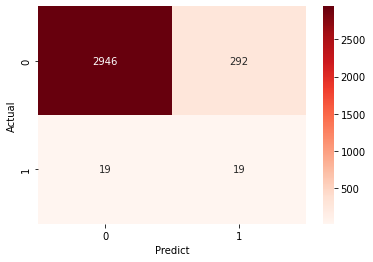

[[2946  292]
 [  19   19]]
accuracy 0.905
precision :  0.061
recall :  0.5
f1_score :  0.109


In [ ]:
Excute_knn(X_oversampled,y_oversampled, X_test_scaled, y_test)

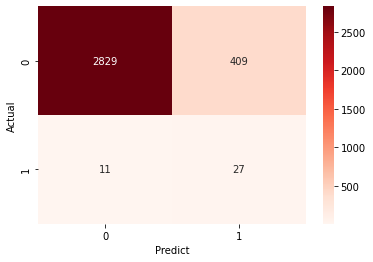

[[2829  409]
 [  11   27]]
accuracy 0.872
precision :  0.062
recall :  0.711
f1_score :  0.114


In [ ]:
Excute_svm(X_oversampled,y_oversampled, X_test_scaled, y_test)

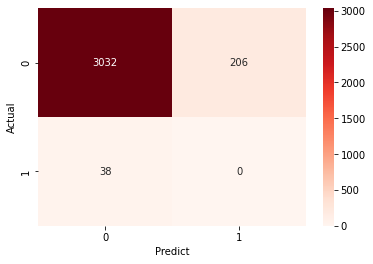

[[3032  206]
 [  38    0]]
accuracy 0.926
precision :  0.0
recall :  0.0
f1_score :  0.0


In [ ]:
Excute_dt(X_oversampled,y_oversampled, X_test_scaled, y_test)

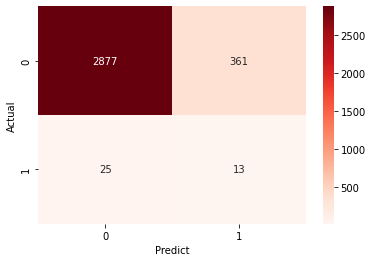

[[2877  361]
 [  25   13]]
accuracy 0.882
precision :  0.035
recall :  0.342
f1_score :  0.063


In [ ]:
Excute_pr(X_oversampled,y_oversampled, X_test_scaled, y_test)

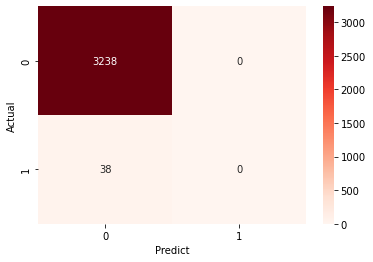

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_rf(X_oversampled,y_oversampled, X_test_scaled, y_test)

# CASE 8. 다른 scaler를 적용

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

# Fowrard Selection

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
## 전진 선택법
variables = X_train.columns.tolist() ## 설명 변수 리스트
 
y = y_train ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
print(len(selected_variables))
selected_variables

34


['총자본순이익률',
 '적립금비율(재정비율)',
 'CASH FLOW 대 총자본비율',
 '자기자본순이익률',
 '기업순이익률',
 '자기자본증가율',
 '수지비율',
 '당좌자산구성비율',
 '이자보상배율(순금융비용)',
 '순운전자본비율',
 '자기자본회전률',
 '비유동부채비율',
 '외환이익 대 매출액비율',
 '타인자본회전률',
 '총자본영업이익률',
 '총자본사업이익률',
 '비유동비율',
 '유동부채비율',
 '비유동장기적합률',
 '타인자본구성비율',
 '자기자본구성비율',
 '부채비율',
 '투자집중도',
 '종업원1인당 인건비증가율',
 '단기차입금 대 총차입금비율',
 'EPS(Earning Per Share)(원)',
 '경영자본순이익률',
 '차입금의존도',
 '재고자산증가율',
 '유보액대비율',
 '광고선전비 대 매출액비율',
 '매출원가 대 매출액비율',
 '종업원1인당 부가가치(백만원).1',
 '종업원1인당 부가가치(백만원)']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_

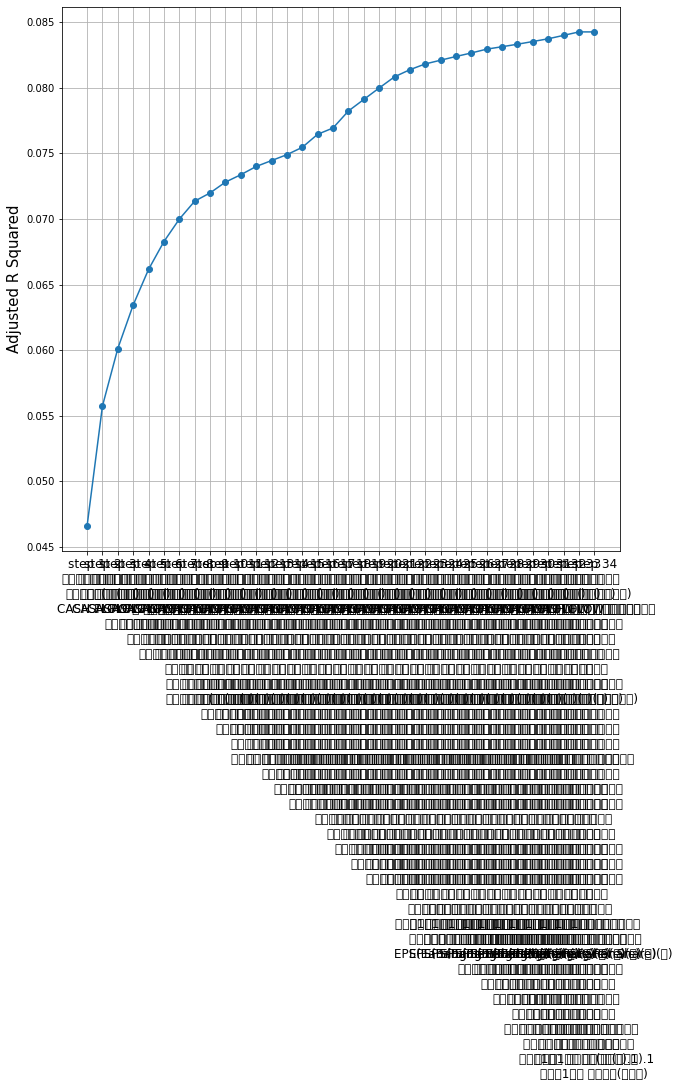

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# Backward Elimination

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
## 후진 소거법
variables = X_train.columns.tolist() ## 설명 변수 리스트
 
y = y_train ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(X_train[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
print(len(selected_variables))
selected_variables

63


['자기자본증가율',
 '종업원1인당 인건비증가율',
 '매출액총이익률',
 '매출액영업이익률',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본영업이익률',
 '총자본순이익률',
 '자본금순이익률',
 '기업순이익률',
 '경영자본영업이익률',
 '경영자본순이익률',
 '매출원가 대 매출액비율',
 '영업비율',
 '영업외손익률',
 '금융비용부담률',
 '외환이익 대 매출액비율',
 '광고선전비 대 매출액비율',
 '수지비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '사내유보 대 자기자본비율',
 '적립금비율(재정비율)',
 '자기자본배당률',
 '유보율',
 '유동자산구성비율',
 '당좌자산구성비율',
 '비유동자산구성비율',
 '자기자본구성비율',
 '타인자본구성비율',
 '비유동비율',
 '비유동장기적합률',
 '당좌비율',
 '부채비율',
 '유동부채비율',
 '단기차입금 대 총차입금비율',
 '비유동부채비율',
 '순운전자본비율',
 '이자보상배율(순금융비용)',
 '유보액 대 납입자본배율',
 '유동자산집중도',
 '비유동자산집중도',
 '투자집중도',
 'CASH FLOW 대 총자본비율',
 '자기자본회전률',
 '타인자본회전률',
 '매입채무회전기간',
 '매출채권회전기간',
 '부가가치(백만원)',
 '종업원1인당 순이익(백만원)',
 '부가가치율',
 '노동소득분배율',
 '자본분배율',
 '부가가치(백만원).1',
 '법인세비용차감전(계속사업)손익(백만원)',
 '인건비(백만원)',
 '금융비용(백만원)',
 '임차료(백만원)',
 '조세공과(백만원)',
 '감가상각비(백만원)',
 '부가가치율.1',
 'PSR(Price sales ratio)(최고)',
 'PSR(Price sales ratio)(최저)']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

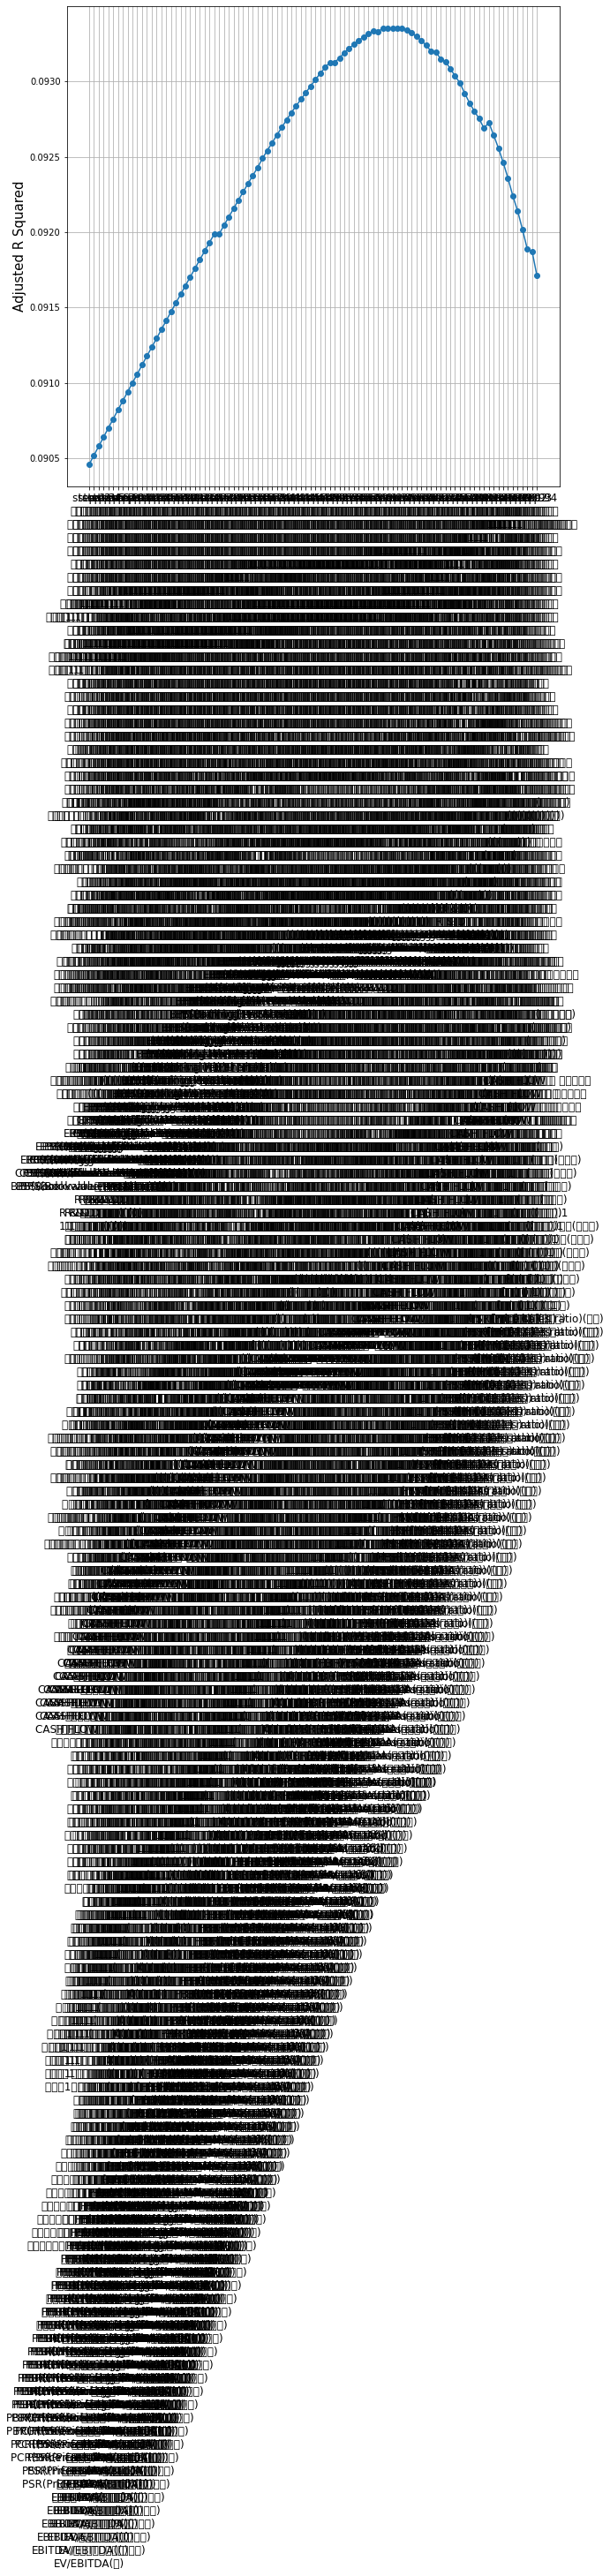

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# Stepwise Feature Selection+ SMOTE

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
## 전진 단계별 선택법
variables = X_train.columns.tolist() ## 설명 변수 리스트
y = y_train ## 반응 변수

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [ ]:
print(len(selected_variables))
selected_variables

33


['총자본순이익률',
 '적립금비율(재정비율)',
 'CASH FLOW 대 총자본비율',
 '자기자본순이익률',
 '기업순이익률',
 '자기자본증가율',
 '수지비율',
 '당좌자산구성비율',
 '이자보상배율(순금융비용)',
 '순운전자본비율',
 '자기자본회전률',
 '비유동부채비율',
 '외환이익 대 매출액비율',
 '타인자본회전률',
 '총자본영업이익률',
 '총자본사업이익률',
 '비유동비율',
 '유동부채비율',
 '비유동장기적합률',
 '타인자본구성비율',
 '자기자본구성비율',
 '부채비율',
 '투자집중도',
 '종업원1인당 인건비증가율',
 '단기차입금 대 총차입금비율',
 'EPS(Earning Per Share)(원)',
 '차입금의존도',
 '재고자산증가율',
 '유보액대비율',
 '광고선전비 대 매출액비율',
 '매출원가 대 매출액비율',
 '종업원1인당 부가가치(백만원).1',
 '종업원1인당 부가가치(백만원)']

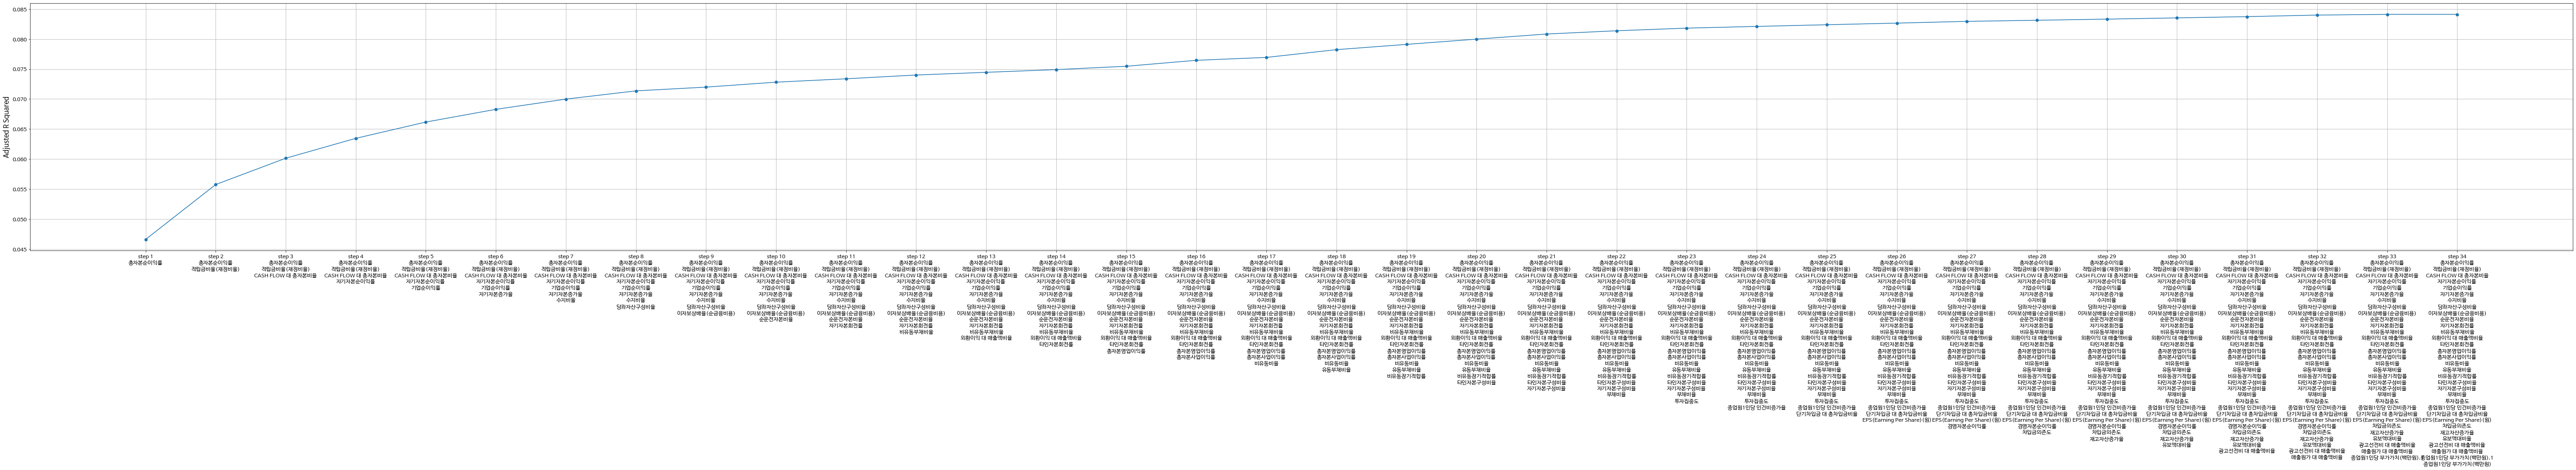

In [ ]:
fig = plt.figure(figsize=(100,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
X_train_fs = X_train[selected_variables]
X_test_fs = X_test[selected_variables]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_fs_smote, y_train_smote = smote.fit_resample(X_train_fs,y_train)

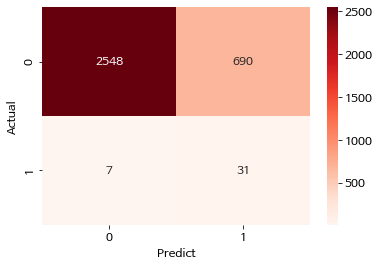

[[2548  690]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082


In [ ]:
Excute_lg(X_train_fs_smote, y_train_smote, X_test_fs, y_test)

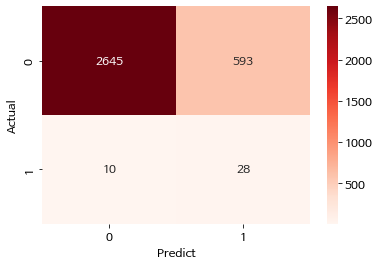

[[2645  593]
 [  10   28]]
accuracy 0.816
precision :  0.045
recall :  0.737
f1_score :  0.085


In [ ]:
Excute_sgd(X_train_fs_smote, y_train_smote, X_test_fs, y_test)

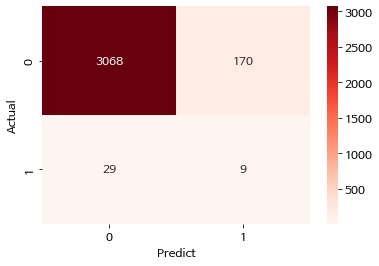

[[3068  170]
 [  29    9]]
accuracy 0.939
precision :  0.05
recall :  0.237
f1_score :  0.083


In [ ]:
Excute_sgd(X_train_feature_selected, y_train, X_test_feature_selected, y_test)

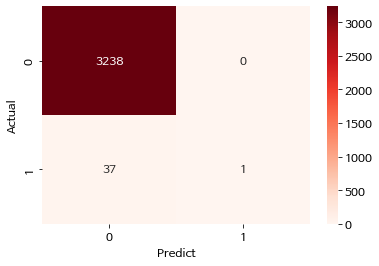

[[3238    0]
 [  37    1]]
accuracy 0.989
precision :  1.0
recall :  0.026
f1_score :  0.051


In [ ]:
Excute_knn(X_train_feature_selected, y_train, X_test_feature_selected, y_test)

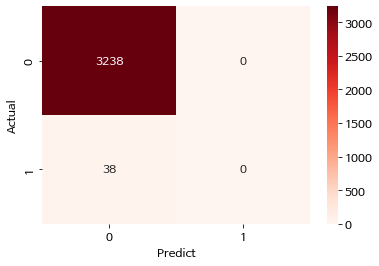

[[3238    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Excute_svm(X_train_feature_selected, y_train, X_test_feature_selected, y_test)

# final_df, stepwise feature selection

In [ ]:
final_df = pd.read_csv("final_df.csv")
drop_col = ['회사명', '거래소코드','회계년도', '산업코드', '소속코드', '상장일', '감사의견코드','산업대분류']
final_df.drop(columns=drop_col, inplace=True)

In [ ]:
X_df= final_df.drop(['차기부도여부'], axis=1)
y_df = final_df['차기부도여부']

In [ ]:
## 전진 단계별 선택법
variables = X_df.columns.tolist() ## 설명 변수 리스트
y = y_df ## 반응 변수

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [ ]:
print(len(selected_variables))
selected_variables

30


['총자본순이익률',
 '적립금비율(재정비율)',
 '기업순이익률',
 'CASH FLOW 대 총자본비율',
 '자기자본순이익률',
 '자기자본증가율',
 '자본금순이익률',
 '경영자본순이익률',
 '자본금영업이익률',
 '이자보상배율(순금융비용)',
 '단기차입금 대 총차입금비율',
 '외환이익 대 매출액비율',
 '종업원1인당 인건비증가율',
 '종업원1인당 부가가치(백만원).1',
 'EPS(Earning Per Share)(원)',
 '종업원1인당 부가가치(백만원)',
 '자기자본구성비율',
 '자기자본회전률',
 '타인자본회전률',
 '타인자본구성비율',
 '종업원1인당 인건비(백만원)',
 '당좌자산구성비율',
 '순운전자본비율',
 '비유동부채비율',
 '비유동비율',
 '유동부채비율',
 '부채비율',
 '종업원1인당 매출액증가율',
 '비유동장기적합률',
 '영업외손익률']

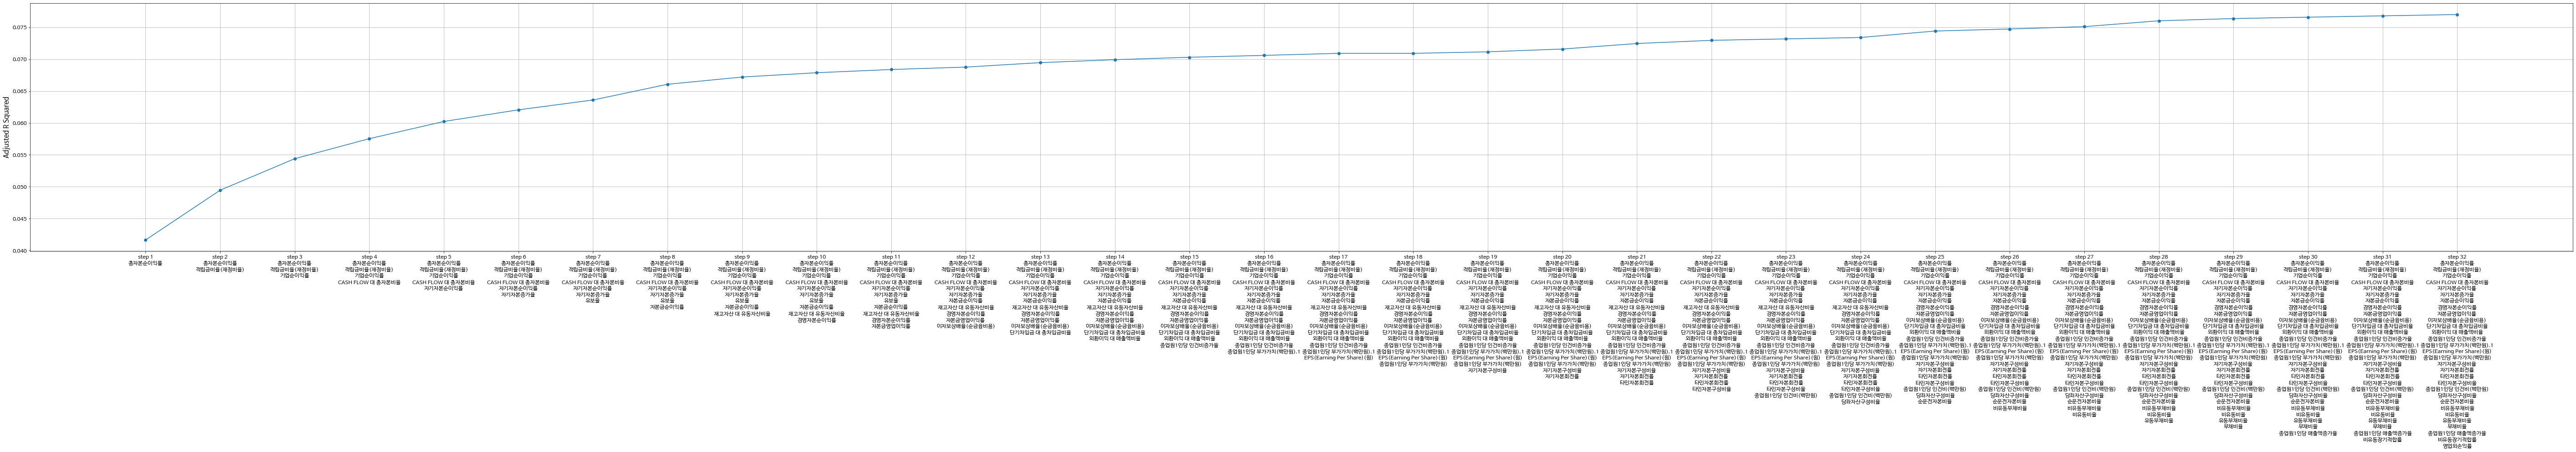

In [ ]:
fig = plt.figure(figsize=(100,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
selected_variables_final_df = ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률',
                               '자기자본증가율','자본금순이익률', '경영자본순이익률', '자본금영업이익률', '이자보상배율(순금융비용)', 
                               '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '종업원1인당 인건비증가율', '종업원1인당 부가가치(백만원).1',
                              'EPS(Earning Per Share)(원)', '종업원1인당 부가가치(백만원)', '자기자본구성비율', '자기자본회전률', '타인자본회전률',
                              '타인자본구성비율', '종업원1인당 인건비(백만원)', '당좌자산구성비율', '순운전자본비율', '비유동부채비율',
                              '비유동비율', '유동부채비율', '부채비율', '종업원1인당 매출액증가율', '비유동장기적합률', '영업외손익률']
selected_variables_train_df = ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', 
                               '자기자본증가율', '수지비율', '당좌자산구성비율', '이자보상배율(순금융비용)', '순운전자본비율', '자기자본회전률',
                              '비유동부채비율', '외환이익 대 매출액비율', '타인자본회전률', '총자본영업이익률', '총자본사업이익률', '비유동비율',
                              '유동부채비율', '비유동장기적합률', '타인자본구성비율', '자기자본구성비율', '부채비율', '투자집중도', '종업원1인당 인건비증가율',
                                '단기차입금 대 총차입금비율', 'EPS(Earning Per Share)(원)', '차입금의존도', '재고자산증가율', '유보액대비율', '광고선전비 대 매출액비율',
                                '매출원가 대 매출액비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)']

In [ ]:
set(selected_variables_final_df).intersection(set(selected_variables_train_df))

{'CASH FLOW 대 총자본비율',
 'EPS(Earning Per Share)(원)',
 '기업순이익률',
 '단기차입금 대 총차입금비율',
 '당좌자산구성비율',
 '부채비율',
 '비유동부채비율',
 '비유동비율',
 '비유동장기적합률',
 '순운전자본비율',
 '외환이익 대 매출액비율',
 '유동부채비율',
 '이자보상배율(순금융비용)',
 '자기자본구성비율',
 '자기자본순이익률',
 '자기자본증가율',
 '자기자본회전률',
 '적립금비율(재정비율)',
 '종업원1인당 부가가치(백만원)',
 '종업원1인당 부가가치(백만원).1',
 '종업원1인당 인건비증가율',
 '총자본순이익률',
 '타인자본구성비율',
 '타인자본회전률'}

In [ ]:
print(set(selected_variables_train_df).difference(set(selected_variables_final_df)))

{'차입금의존도', '총자본사업이익률', '투자집중도', '재고자산증가율', '매출원가 대 매출액비율', '유보액대비율', '광고선전비 대 매출액비율', '수지비율', '총자본영업이익률'}


In [ ]:
print(set(selected_variables_final_df).difference(set(selected_variables_train_df)))

{'자본금영업이익률', '자본금순이익률', '경영자본순이익률', '영업외손익률', '종업원1인당 매출액증가율', '종업원1인당 인건비(백만원)'}


# binning_scaling + undersampling

In [ ]:
train = pd.read_csv('binning_train.csv')
test = pd.read_csv('binning_test.csv')


X_train = train.drop(['차기부도여부'], axis= 1)
y_train = train['차기부도여부']

X_test = test.drop(['차기부도여부'], axis=1)
y_test = test['차기부도여부']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    14986
1      176
Name: 차기부도여부, dtype: int64

In [ ]:
y_undersampled.value_counts()

1    176
0    176
Name: 차기부도여부, dtype: int64

In [ ]:
y_oversampled.value_counts()

1    14986
0    14986
Name: 차기부도여부, dtype: int64

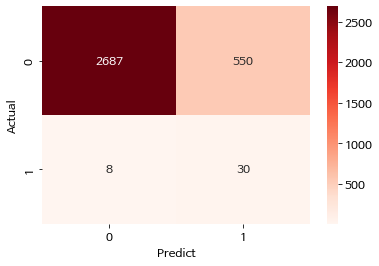

[[2687  550]
 [   8   30]]
accuracy 0.83
precision :  0.052
recall :  0.789
f1_score :  0.097


In [ ]:
Excute_svm(X_undersampled, y_undersampled, X_test, y_test)

                     count  mean   std   min   25%   50%   75%   max
actual prediction                                                   
0      0          2687.000 0.125 0.111 0.010 0.045 0.080 0.166 0.486
       1           550.000 0.754 0.148 0.487 0.629 0.761 0.885 0.996
1      0             8.000 0.246 0.152 0.071 0.125 0.211 0.373 0.442
       1            30.000 0.837 0.153 0.490 0.775 0.888 0.959 0.989


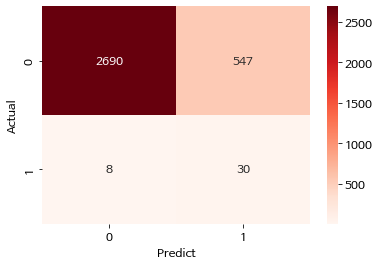

[[2690  547]
 [   8   30]]
accuracy 0.831
precision :  0.052
recall :  0.789
f1_score :  0.098


In [ ]:
Excute_svm_change_cutoff(X_undersampled, y_undersampled, X_test, y_test)

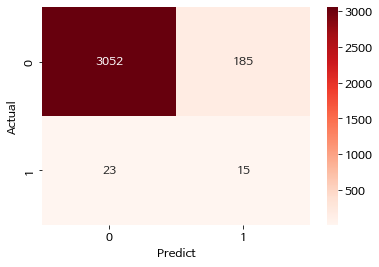

[[3052  185]
 [  23   15]]
accuracy 0.936
precision :  0.075
recall :  0.395
f1_score :  0.126


In [ ]:
Excute_svm(X_oversampled, y_oversampled, X_test, y_test)

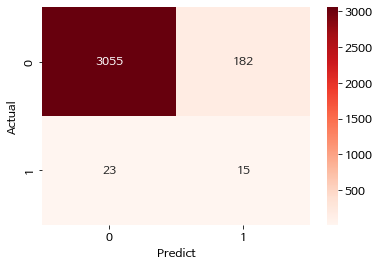

[[3055  182]
 [  23   15]]
accuracy 0.937
precision :  0.076
recall :  0.395
f1_score :  0.128


In [ ]:
Excute_svm_change_cutoff(X_oversampled, y_oversampled, X_test, y_test)

In [ ]:
X_df= final_df.drop(['차기부도여부'], axis=1)
y_df = final_df['차기부도여부']

In [ ]:
# feature_selection 진행
## 전진 단계별 선택법
variables = X_train.columns.tolist() ## 설명 변수 리스트
y = y_train ## 반응 변수

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = X_train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

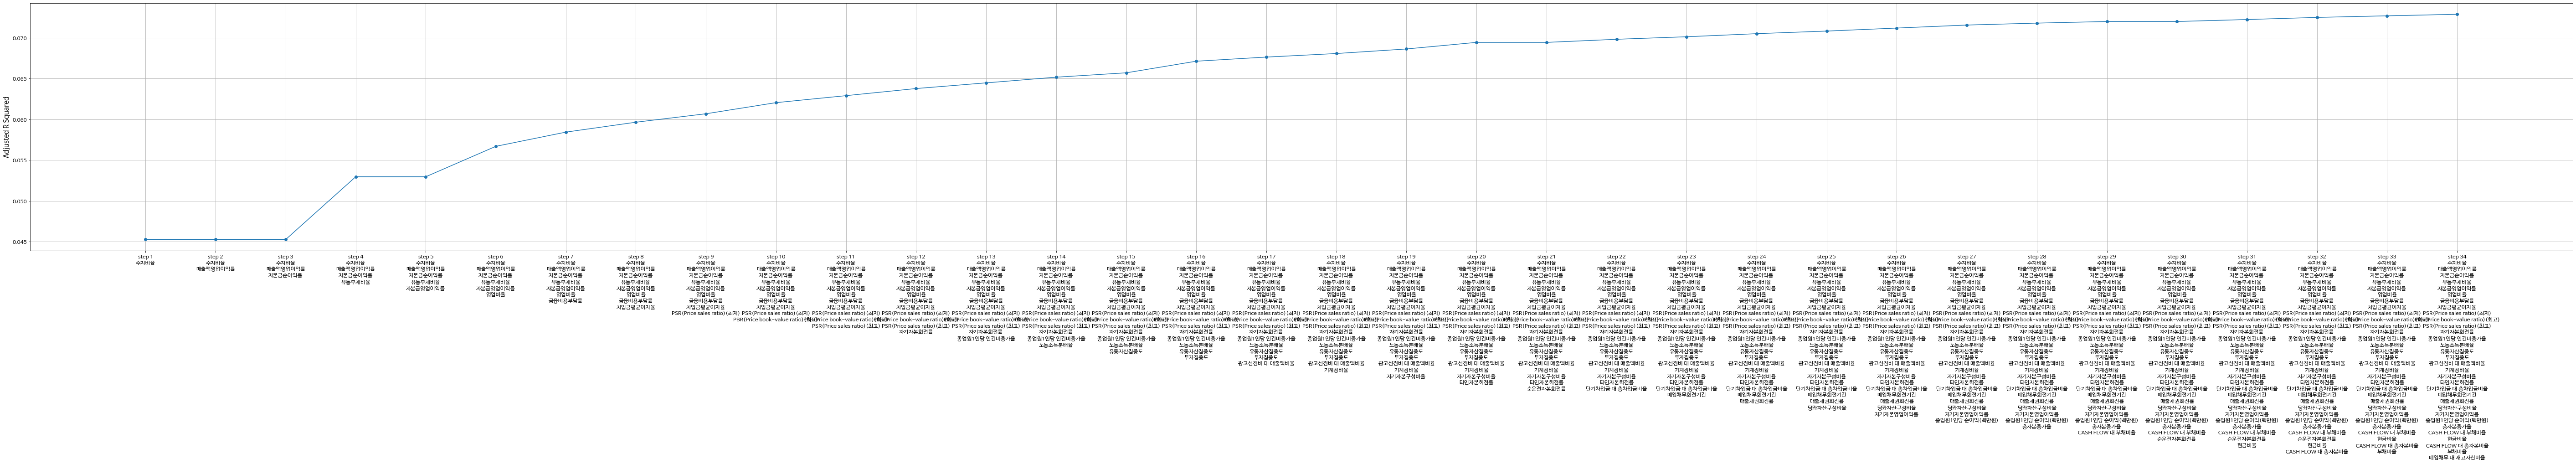

In [ ]:
fig = plt.figure(figsize=(100,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()